# Izračun impedancije LISN-a

Shema standardnog LISN-a prikazana je na sljedećoj slici:
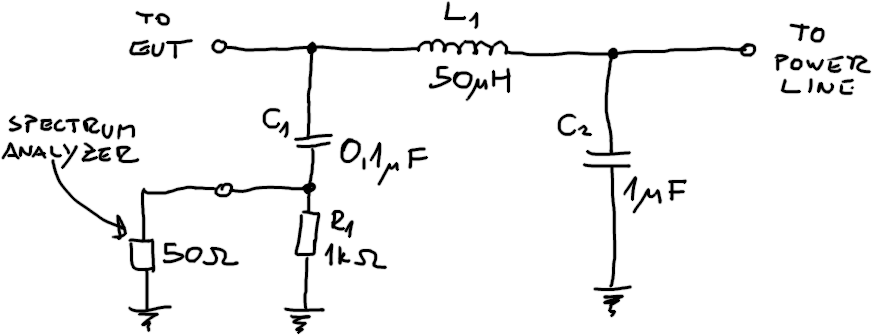

Impedancija koju vidi EUT (eng. Equipment under test) jednaka je

$Z_{EUT} = (Z_{C1}+\frac{R_1\cdot 50\Omega}{R_1+50\Omega})\parallel(Z_{L1}+Z_{C2})$

In [24]:
%matplotlib inline
from ipywidgets import widgets
from ipywidgets import Layout
import numpy as np
import matplotlib.pyplot as plt

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=5, step=1, value=100e3,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=6, max=8, step=1, value=100e6,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ymin = widgets.FloatSlider(min=1,max=10, step=1, value=1,description='plot $y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
ymax = widgets.FloatSlider(min=20,max=100, step=1, value=100,description='plot $y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)

L1 = widgets.FloatSlider(min=1, max=100, step=1, value=50,description='$L_1$ [uH]:',style=style,layout=Layout(width='75%'), continuous_update=False)
C1 = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=0.1,description='$C_1$ [uF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
C2 = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1,  description='$C_2$ [uF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
R1 = widgets.FloatSlider(min=100, max=10000, step=100, value=1000,description='$R_1$ [$\Omega$]:',style=style,layout=Layout(width='75%'), continuous_update=False)

# LISN parameters
RLISN = 50
# Spectrum analyzer
RT = 50

def f(fmin, fmax, ymin, ymax, L1, C1, C2, R1):    
    
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
    plt.rcParams.update({'font.size': 18})  
    axes = plt.gca()
    axes.set_xscale("log")
    axes.set_yscale("linear")   
    plt.sca(axes) 
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('$Z_{EUT}$ [Ohm]')          
    plt.grid(axis='both')       
    plt.ylim(bottom = ymin, top = ymax)             
    plt.xlim(left = fmin, right = fmax)     
    
    freq = np.logspace(np.log10(fmin), np.log10(fmax), num=200)
    
    C1 = C1/1e6
    C2 = C2/1e6
    L1 = L1/1e6
    
    # caluclation of impedances
    ZL1 = 1j*2*np.pi*freq*L1
    ZC1 = 1/(1j*2*np.pi*freq*C1)
    ZC2 = 1/(1j*2*np.pi*freq*C2)

    ZRTR1 = RT*R1/(RT+R1)
    ZRTR1C1 = ZRTR1 + ZC1
    ZL1C2 = ZL1+ZC2
    ZEUT = np.abs(ZRTR1C1*ZL1C2/(ZRTR1C1+ZL1C2))                    

    axes.plot(freq, ZEUT, '-')

        
out = widgets.interactive_output(f, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 
                                  'L1': L1, 'C1': C1, 'C2': C2, 
                                  'R1': R1})

tab1 = widgets.VBox(children=[fmin,fmax, ymin, ymax])
tab2 = widgets.VBox(children=[L1,C1,C2,R1])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'LISN params')

widgets.VBox([tab, out])
